# Prototype and R&D for the Feelings Score Development

## In order to create the prototype, a couple of requirements are needed first.

<span style="font-size: large;">The decision has been made to use **[Wisper](https://openai.com/research/whisper)** from [OpenAI](https://openai.com/) to perform the sentiment analysis on a video call.</span>

<span style="font-size: large;">The **[OpenCV: Open Source Computer Vision Library](https://github.com/opencv/opencv)** will also be utilized for video manipulation and extracting the images of the subjects in the video.</span>

<span style="font-size: large;">**[ffmpeg-python](https://github.com/kkroening/ffmpeg-python)** serves as a Python wrapper for the FFmpeg multimedia framework. FFmpeg, an open-source software suite, is capable of handling multimedia data, including audio and video, which is required for this project.</span>

<span style="font-size: large;">For the prototype, Video's that have been published by individuals known to the project creator will be used. The subjects in the video have completed the consent form as per **Appendix A**.</span>

A link to the consent form can be found in the reference section of the report.

## To achieve the steps outlined in the project design section I have created the sections as below:
<span style="font-size: large;"></span>
<span style="font-size: large;">
<div style="font-size: large;">1. Identify relevant emotions and sentiment categories.</div>
<div style="font-size: large;">2. Determining Weights or Importance.</div>
<div style="font-size: large;">3. Collecting and Pre-processing Data.</div>
<div style="font-size: large;">4. Facial Emotion Recognition and Sentiment Analysis.</div>
<div style="font-size: large;">5. Normalizing the Scores.</div>
<div style="font-size: large;">6. Combining Scores into a Composite Index.</div>
<div style="font-size: large;">7. Validation of the Index Score.</div>
</span>

#### The following libraries will be installed and used:

In [121]:
!pip install wisper

In [122]:
!pip install moviepy

In [123]:
!pip install opencv-python

In [124]:
!pip install ffmpeg-python

In [125]:
!pip install pandas

### 1. Identify relevant emotions and sentiment categories.

In [3]:
emotional_states = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
sentiment_categories = ['Positive', 'Negative', 'Neutral']

### 2. Determining Weights or Importance

### Expert judgment is employed to determine the values assigned based on the emotion.

The emotion with the higest score is Happy : 3
The worst sentiment is Negative with a score of -1

In [4]:
emotional_weights = {'Angry': -3, 'Disgust': -3, 'Fear': -2, 'Happy': 3, 'Sad': -1, 'Surprised': 1, 'Neutral': 1}
sentiment_weights = {'Positive': 1, 'Neutral': 0, 'Negative': -1 }

### 3. Collecting and Pre-processing Data.

<span style="font-size: large;">For the prototype, recorded videos of short duration will be utilized to demonstrate the functionality and accuracy of the approach in determining sentiment and facial recognition.</span>

<span style="font-size: large;">The extraction of audio from the video and the application of facial recognition will be employed to capture snapshots of the subjects in the video and perform emotional recognition.</span>

<span style="font-size: large;">Wisper will be employed for video transcription, with each spoken sentence being assigned a timestamp indicating the start and end time within the video. The average timestamp will be used to extract the subject's facial expression at the specified time and analyze it for emotion, assigning a relevant score.</span>

<span style="font-size: large;">The Open CV library will also be utilized, known for its speed and efficiency, making it a popular choice for real-time applications and performance-critical tasks.</span>



### In order to use the wisper openAI model you have to have ffmpeg instaled: 
    
Linux: sudo apt update && sudo apt install ffmpeg

MacOS: brew install ffmpeg

Windows: chco install ffmpeg

### [ffmpeg guide](https://ffmpeg.org/download.html)

### 4. Facial Emotion Recognition and Sentiment Analysis

<span style="font-size: large;">A function named transScribeVideo will be created to transcribe the audio of the given video. This transcription will be utilized for further processing to obtain the sentiment of the spoken sentence.</span>

<span style="font-size: large;">To extract the face at a specific point in time based on the spoken sentence, the start and end timing of the sentence in the video will be utilized to calculate the mean.</span>

<span style="font-size: large;">Based on the mean and the frames per second, the video frame will be extracted at that specific point in time. These frames will be added to a processedData frame. a funtions called add_image_from_video will be used to achive this.</span>

<span style="font-size: large;">Subsequently, the face within each frame will be detected and saved for emotional classification using the model, as well as for sentiment analysis of the sentence during that time. a Function called extract_faces_from_frames will be created to perform this facial detecting using the CascadeClassifier within CV2 to detect faces.</span>

In [5]:
import whisper
import cv2

model = whisper.load_model("medium.en")

100%|█████████████████████████████████████| 1.42G/1.42G [06:17<00:00, 4.05MiB/s]


![Wisper Model](LanguagesSupported.png)

In [18]:
import pandas as pd

file_path = 'E:\OneDrive\OneDrive - Personal\OneDrive\Studies\CM3070 - Final Project\ParticioantVideos\Hussain2'
processedData = pd.DataFrame()

In [19]:
def transScribeVideo(video_path):
    """
    Transcribes the audio from a video file using a pre-trained model.

    Args:
        video_path (str): The path to the video file.

    Returns:
        str: The transcription result.

    Raises:
        Exception: If an error occurs during the transcription process.
    """
   
    try:
        video = cv2.VideoCapture(video_path + ".mp4")
        result = model.transcribe(video_path + ".mp4",verbose=False)
        return result, video
    except Exception as e:
        print("Error occurred:", str(e))

In [20]:
transcription, video = transScribeVideo(file_path)

100%|█████████████████████████████████████████████████████████████████████████| 2931/2931 [00:21<00:00, 139.42frames/s]


In [21]:
print("------------------------------------------")
print("Text in the Video")
print("------------------------------------------")

print(transcription["text"])

print("------------------------------------------")
print("Sentences in the Video")
print("------------------------------------------")

for i, seg in enumerate(transcription['segments']):
  print(i+1, "- ", seg['text'])

------------------------------------------
Text in the Video
------------------------------------------
 With the fantastic and rich content and the thrilling lineup of global speakers and panel sessions for its second iteration, LEAP has already raised the bar of not only regional but also global technology shows. This year we look forward to demonstrating how SAP and our partners can meet all our customers' transformation needs. Please do visit us at SAP Stand in LEAP. We really look forward to seeing you there.
------------------------------------------
Sentences in the Video
------------------------------------------
1 -   With the fantastic and rich content and the thrilling lineup of global speakers and panel sessions for its second iteration,
2 -   LEAP has already raised the bar of not only regional but also global technology shows.
3 -   This year we look forward to demonstrating how SAP and our partners can meet all our customers' transformation needs.
4 -   Please do visit u

In [22]:
import pandas as pd
sentences = pd.DataFrame.from_dict(transcription['segments'])
# Verify the sentences spoken
sentences.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.0,10.0,With the fantastic and rich content and the t...,"[50363, 2080, 262, 9623, 290, 5527, 2695, 290,...",0.0,-0.149466,1.604651,0.004801
1,1,0,10.0,16.0,LEAP has already raised the bar of not only r...,"[50863, 12509, 2969, 468, 1541, 4376, 262, 231...",0.0,-0.149466,1.604651,0.004801
2,2,0,16.0,23.0,This year we look forward to demonstrating ho...,"[51163, 770, 614, 356, 804, 2651, 284, 21135, ...",0.0,-0.149466,1.604651,0.004801
3,3,0,23.0,29.0,Please do visit us at SAP Stand in LEAP. We r...,"[51513, 4222, 466, 3187, 514, 379, 48323, 5751...",0.0,-0.149466,1.604651,0.004801


### Apply sentiment analysis 

<span style="font-size: large;">In order to apply sentment analysis, all stop words and punctuations needs to be removed and then the text need to be scored. based on the score outcome add another column sentiment with the sentiment weight. **SentimentIntensityAnalyzer()** will be used with **Naive Bayes model**.</span>

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    """
    Preprocesses the input text by tokenization, removing punctuation and stopwords, and lemmatization.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text after tokenization, punctuation removal, stopwords removal, and lemmatization.
    """
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [24]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Step 1: Prepare the dataset 
data = sentences
processedData['text'] = None
processedData['preprocessed_text'] = None
processedData['sentiment_score'] = None

# Step 2: Text Preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Apply text preprocessing to the 'text' column
processedData['text'] = data['text']
processedData['preprocessed_text'] = data['text'].apply(preprocess_text)

# Step 4: Train the Naive Bayes model (or any sentiment analysis model)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Step 5: Apply the Naive Bayes model to the DataFrame and add 'sentiment' column
processedData['sentiment_score'] = processedData['preprocessed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define a function to map sentiment scores to labels
def get_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Map sentiment scores to labels and add the 'sentiment' column
processedData['sentiment'] = processedData['sentiment_score'].apply(get_sentiment_label)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
processedData['sentiment_weights'] = processedData['sentiment'].map(sentiment_weights)

# Display the updated DataFrame
processedData[['sentiment','sentiment_weights']]

,sentiment,sentiment_weights
0,Positive,1
1,Neutral,0
2,Neutral,0
3,Positive,1


### Processing Video for Emotional Classification

In [26]:
#Get the mean of spoken text for the Images from the Video 
sentences['mean_value'] = sentences.apply(lambda row: (row['start'] + row['end']) / 2, axis=1)
#sentences.head() - review the dataset

In [27]:
def add_image_from_video(video_path, df):
    """
    Add frames from a video to a DataFrame.

    Parameters:
        video_path (str): Path to the video file.
        df (pandas.DataFrame): DataFrame to store the frame information.

    Returns:
        pandas.DataFrame: Updated DataFrame with frame information.

    """
    
    # Create a new column for the image
    imageDetails = pd.DataFrame()
    imageDetails['frame_location'] = None
    imageDetails['frame'] = None
   
    video = cv2.VideoCapture(video_path + '.mp4')
    # Get the frames per second (FPS)
    fps = video.get(cv2.CAP_PROP_FPS)
    
    # Reduce the frame size to make getting the image much faster
    frame_width = 640
    frame_height = 480
    video.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
    video.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)
    video.release()
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        video = cv2.VideoCapture(file_path + '.mp4')
        
        # Get the mean value from the 'mean' column
        position = (int(row['mean_value']) * fps)
        imageDetails.at[index, 'frame_location'] = position
        
        # Set the video position
        video.set(cv2.CAP_PROP_POS_FRAMES, position)
        #print(position)
        
        # Read the frame at the specified position
        ret, frame = video.read()
        #print(ret)
        
        if ret:
            # Convert the frame to RGB format
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Add the image to the DataFrame
            imageDetails.at[index, 'frame'] = frame_rgb
        # Release the video capture    
        video.release()
    return imageDetails

In [28]:
#Get the Frame based on the fps(frame per second) rate of the video and the mean
frameInfo = add_image_from_video(file_path, sentences)

processedData = processedData.assign(
    frame_location=frameInfo['frame_location'],
    frame=frameInfo['frame']
)

#processedData.head() - review the dataset

#### Verify the image at the position of the mean_value as per the extracted frame by opening the video and going to the specific frame in the video and verify the image returned corrisponds to that in the video. 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def display_image_from_column(df, column_name, row_index):
    """
    Display an image from a specified column in a DataFrame.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the image column.
        column_name (str): Name of the column containing the images.
        row_index (int): Row index of the image to display.

    """
    # Retrieve the image from the DataFrame
    image = df[column_name].iloc[row_index]

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Remove axis ticks
    plt.show()

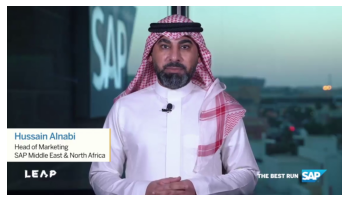

In [30]:
#Verify the image at the position of the mean_value as per the extracted frame

column_name = 'frame'
row_index = 0

# Call the function to display the image
display_image_from_column(processedData, column_name, row_index)

#### To verify that all frames have been extracted and is clear the following funtion will retreive and show all the frames captured and saved to the processedData data frame

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_grid(df, column_name):
    """
    Display a grid of images from a specified column in a DataFrame.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the image column.
        column_name (str): Name of the column containing the images.

    """
    # Get the number of images
    num_images = len(df[column_name])

    # Calculate the number of rows and columns for the grid
    num_rows = int(np.sqrt(num_images))
    num_cols = int(np.ceil(num_images / num_rows))

    # Create a figure and axes for the grid of images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Iterate through each image and display it in the corresponding grid cell
    for i, image in enumerate(df[column_name]):
        # Reshape the image to 2D if needed
        if len(image.shape) == 3:
            image = image[:, :, 0]  

        # Determine the current grid cell coordinates
        row = i // num_cols
        col = i % num_cols

        # Display the image in the corresponding grid cell
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(image, cmap='gray')  # Adjust the cmap if needed
        ax.axis('off')

    # Adjust the layout and padding of the grid
    plt.tight_layout()

    # Show the grid of images
    plt.show()

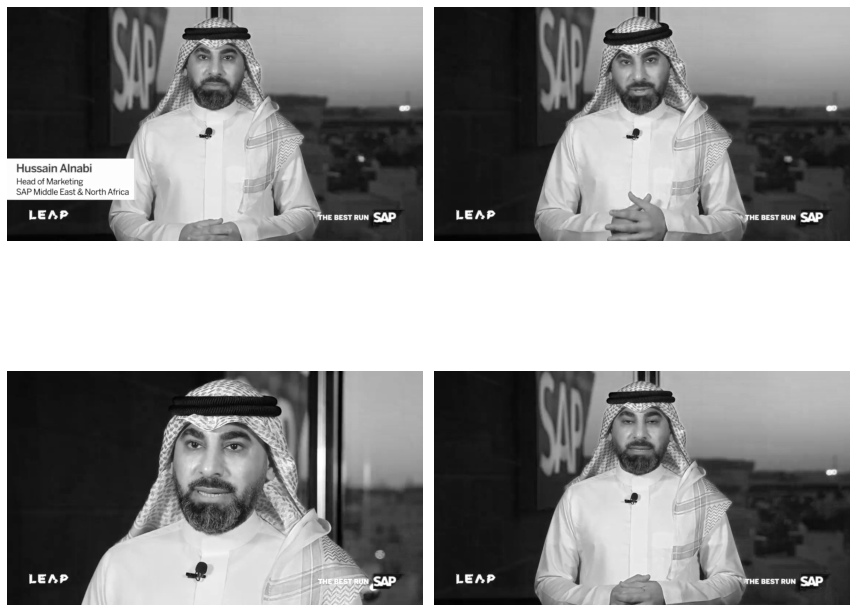

In [32]:
# Call the function to display the grid of images
display_image_grid(processedData, 'frame')

### In order to apply my emotional model I need to extract the face of the person at a specific frame of the video. 

<span style="font-size: large;">The CascadeClassifier class is part of the OpenCV library and provides an implementation of the Haar cascades algorithm, which is a machine learning-based approach for object detection. The **Haar cascades algorithm** uses a set of trained classifiers to detect objects in images or video frames.</span>

In [33]:
def extract_faces_from_frames(df):
    # Load the pre-trained face detection cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    df['face'] = None
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Retrieve the frame image from the DataFrame
        frame = row['frame']
        
        # Convert the frame image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        
        # Perform face detection on the grayscale image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(25, 25))
        #Only return the first face found.
        if len(faces) > 0:
            # Select the first detected face
            (x, y, w, h) = faces[0]

            # Extract the face region from the image
            face = frame[y:y+h, x:x+w]

            # Extract the face region from the frame image
            face = frame[y:y+h, x:x+w]
            df.at[index, 'face'] = face

#           # Displaying faces for review
#           cv2.imshow('Face', cv2.cvtColor(face, cv2.COLOR_RGB2BGR))
#           cv2.waitKey(0)

In [34]:
# Extract all the faces from the video based on the Frame data
extract_faces_from_frames(processedData)

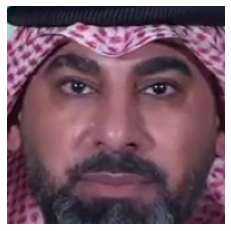

In [35]:
#show the face based on a certain row
column_name = 'face'
row_index = 0
# Call the function to display the image
display_image_from_column(processedData, column_name, row_index)

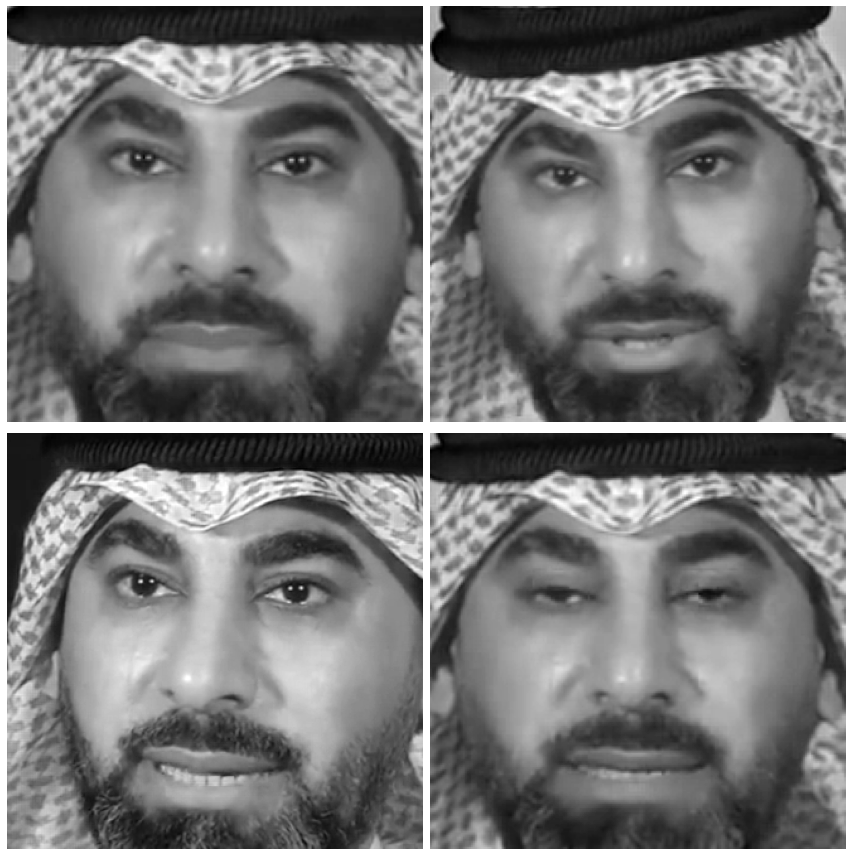

In [36]:
# Call the function to display the grid of images
display_image_grid(processedData, 'face')

#### Get the emotion for the face and map this to a score


I have build a model to perform emotional recognition, and this will be part of the implpementation phase and fine tuning of the project. for now lets manually define the emotions. 

I will be using the 4th generation of my model: 
    
![Model](model.jpg)


### 5. Normalizing the Scores

In [37]:
processedData.head()

,text,preprocessed_text,sentiment_score,sentiment,sentiment_weights,frame_location,frame,face
0,With the fantastic and rich content and the t...,fantastic rich content thrilling lineup global...,0.8834,Positive,1,149.85015,"[[[16, 20, 22], [16, 20, 22], [16, 20, 22], [1...","[[[152, 184, 183], [110, 142, 141], [70, 92, 9..."
1,LEAP has already raised the bar of not only r...,LEAP already raised bar regional also global t...,0.0000,Neutral,0,389.61039,"[[[16, 20, 22], [16, 20, 22], [16, 20, 22], [1...","[[[171, 212, 210], [172, 211, 210], [172, 211,..."
2,This year we look forward to demonstrating ho...,year look forward demonstrating SAP partner me...,0.0000,Neutral,0,569.430569,"[[[13, 19, 22], [13, 19, 22], [13, 19, 22], [1...","[[[20, 28, 37], [20, 28, 37], [20, 28, 37], [2..."
3,Please do visit us at SAP Stand in LEAP. We r...,Please visit u SAP Stand LEAP really look forw...,0.3182,Positive,1,779.220779,"[[[15, 19, 21], [15, 19, 21], [15, 19, 21], [1...","[[[179, 211, 212], [173, 200, 203], [123, 150,..."


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sentiment_scores = processedData['sentiment_score'].values.reshape(-1, 1)

normalized_sentiment_scores = scaler.fit_transform(sentiment_scores)

print("Normalized Sentiment Scores:")
for score in normalized_sentiment_scores:
    print(score[0])

Normalized Sentiment Scores:
1.6158853120491077
-0.832610545007808
-0.832610545007808
0.04933577796650788


### 6. Combining Scores into a Composite Index

In [42]:
emotional_scores = [3, -2, 1, 2]  # Example emotional scores

weighted_emotional_scores = [emotional_weights[emotion] * score for emotion, score in zip(emotional_states, emotional_scores)]
weighted_sentiment_scores = [sentiment_weights[sentiment] * score for sentiment, score in zip(sentiment_categories, sentiment_scores)]

composite_index_score = sum(weighted_emotional_scores + weighted_sentiment_scores)


### 7. Validation of the Index Score

This involves testing the reliability and validity of the index score to ensure that it accurately reflects the emotional and sentiment responses of individuals. Validation can be done through statistical analysis, sensitivity testing, or expert review

In [43]:
print(composite_index_score)

[1.8834]


In [48]:
# Define the maximum normalized scores
max_normalized_emotion_score = 1.0
max_normalized_sentiment_score = 1.0
# Define the minimum normalized scores
min_normalized_emotion_score = 0.0
min_normalized_sentiment_score = 0.0

# Calculate the max and min index score
max_index_score = (max_normalized_emotion_score * emotional_weights['Happy']) + (max_normalized_sentiment_score * sentiment_weights['Positive'])
min_index_score = (min_normalized_emotion_score * emotional_weights['Angry']) + (min_normalized_sentiment_score * sentiment_weights['Negative'])

# Print the maximum index score
print("Maximum Index Score:", max_index_score)
print("Minimum Index Score:", min_index_score)


Maximum Index Score: 4.0
Minimum Index Score: -0.0
